<a href="https://colab.research.google.com/github/divya-r-kamat/DiabeticPatientPrediction/blob/master/PredictingDiabeticPatient_EDA%26Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!cp -R "/content/drive/My Drive/DSHackathon/dataset" .

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/content/dataset/train.csv")
data.head().T

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,0,1,2,3,4
encounter_id,178974720,111231666,134751624,254196636,432617750
patient_id,61754247,110498427,91719990,1897758,34636617
race,Caucasian,AfricanAmerican,Caucasian,Caucasian,Asian
gender,Male,Female,Male,Female,Female
age,[80-90),[50-60),[80-90),[70-80),[80-90)
weight,?,?,?,?,?
admission_type_id,1,3,1,3,2
discharge_disposition_id,3,1,1,1,3
admission_source_id,7,1,7,1,5
time_in_hospital,6,2,5,3,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14696 entries, 0 to 14695
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              14696 non-null  int64 
 1   patient_id                14696 non-null  int64 
 2   race                      14696 non-null  object
 3   gender                    14696 non-null  object
 4   age                       14696 non-null  object
 5   weight                    14696 non-null  object
 6   admission_type_id         14696 non-null  int64 
 7   discharge_disposition_id  14696 non-null  int64 
 8   admission_source_id       14696 non-null  int64 
 9   time_in_hospital          14696 non-null  int64 
 10  tel_1                     14696 non-null  object
 11  tel_2                     14696 non-null  object
 12  tel_3                     14696 non-null  int64 
 13  tel_4                     14696 non-null  int64 
 14  tel_5                 

In [ ]:
test_df = pd.read_csv("/content/dataset/test.csv")
test_df.head()

,encounter_id,patient_id,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,tel_1,tel_2,tel_3,tel_4,tel_5,tel_6,tel_7,tel_8,tel_9,tel_10,tel_11,tel_12,tel_13,tel_14,tel_15,tel_16,tel_17,tel_18,tel_19,tel_20,tel_21,tel_22,tel_23,tel_24,tel_25,tel_26,tel_27,tel_28,tel_29,tel_30,tel_41,tel_42,tel_43,tel_44,tel_45,tel_46,tel_47,tel_48,tel_49
0,97074168,103223088,Caucasian,Female,[60-70),?,1,1,7,4,?,Cardiology,60,6,22,0,0,0,414,411,250.01,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,NO
1,38255910,63949005,Caucasian,Male,[60-70),?,3,1,1,4,?,Urology,58,3,23,0,0,0,185,276,564,4,None,None,No,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Ch,>30
2,36573714,18374697,Caucasian,Male,[70-80),?,1,1,7,3,?,?,40,1,12,0,0,2,511,578,285,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
3,73972230,114583950,Caucasian,Male,[60-70),?,3,6,1,14,?,PhysicalMedicineandRehabilitation,53,3,20,0,0,0,V57,715,V43,9,None,Norm,Up,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,>30
4,68202342,56621763,Caucasian,Male,[70-80),?,6,11,17,10,?,InternalMedicine,74,1,30,3,0,1,428,197,250,8,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO


Dataset is imbalanced

In [ ]:
data.diabetesMed.value_counts()/len(data)

1    0.89868
0    0.10132
Name: diabetesMed, dtype: float64

In [ ]:
data.isnull().sum()

encounter_id                0
patient_id                  0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
tel_1                       0
tel_2                       0
tel_3                       0
tel_4                       0
tel_5                       0
tel_6                       0
tel_7                       0
tel_8                       0
tel_9                       0
tel_10                      0
tel_11                      0
tel_12                      0
tel_13                      0
tel_14                      0
tel_15                      0
tel_16                      0
tel_17                      0
tel_18                      0
tel_19                      0
tel_20                      0
tel_21                      0
tel_22                      0
tel_23                      0
tel_24    

No null values but seems like the missing values are represented as '?', so lets replace these with nan's

In [ ]:
data = data.replace('?', np.nan)
data.isnull().sum().sort_values(ascending=False).head(10)

weight    14315
tel_2      8122
tel_1      2458
race        337
tel_11      139
tel_10       33
tel_9         1
tel_4         0
tel_13        0
tel_12        0
dtype: int64

In [ ]:
data.isnull().mean().sort_values(ascending=False).head(10)

weight    0.974075
tel_2     0.552667
tel_1     0.167256
race      0.022931
tel_11    0.009458
tel_10    0.002246
tel_9     0.000068
tel_4     0.000000
tel_13    0.000000
tel_12    0.000000
dtype: float64

Almost 98% of values are missing from weight - drop it!!

Maybe we could drop tel_2 as well, since almost 55% of values are missing

In [ ]:

# let's look at the different number of labels
# in each variable (cardinality)

# these are the loaded categorical variables
for col in data.columns:
    print('variable: ', col, ' number of labels: ', data[col].nunique())

print('total houses: ', len(data))

variable:  encounter_id  number of labels:  14696
variable:  patient_id  number of labels:  13011
variable:  race  number of labels:  5
variable:  gender  number of labels:  2
variable:  age  number of labels:  10
variable:  weight  number of labels:  8
variable:  admission_type_id  number of labels:  8
variable:  discharge_disposition_id  number of labels:  20
variable:  admission_source_id  number of labels:  16
variable:  time_in_hospital  number of labels:  14
variable:  tel_1  number of labels:  16
variable:  tel_2  number of labels:  47
variable:  tel_3  number of labels:  104
variable:  tel_4  number of labels:  7
variable:  tel_5  number of labels:  70
variable:  tel_6  number of labels:  26
variable:  tel_7  number of labels:  22
variable:  tel_8  number of labels:  16
variable:  tel_9  number of labels:  511
variable:  tel_10  number of labels:  504
variable:  tel_11  number of labels:  536
variable:  tel_12  number of labels:  16
variable:  tel_13  number of labels:  4
varia

encounter_id and paitient id can be dropped as they seems to be id values.
Also, there seems to be multiple entries for same patient as there are 13011 values for patient id and 14696 encounter_id (which is the total records in train dataset)

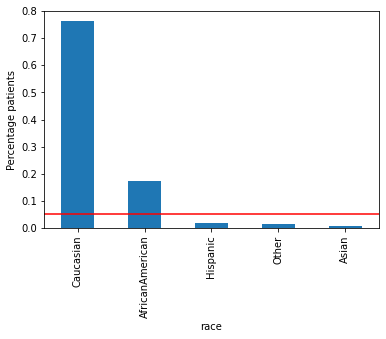

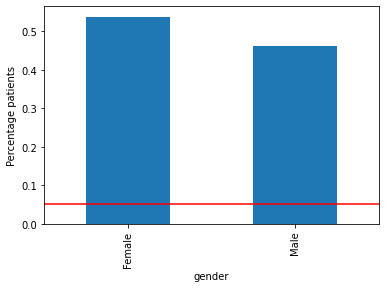

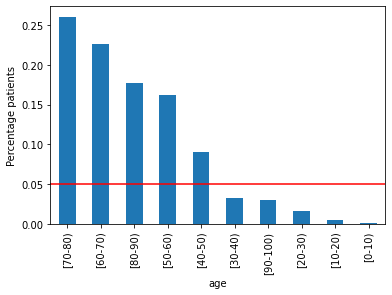

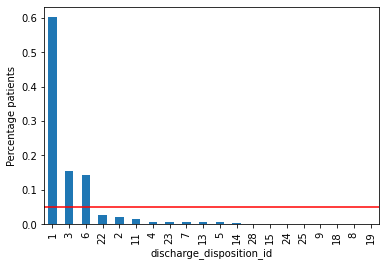

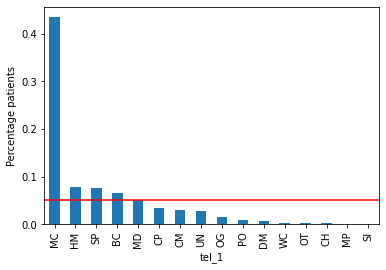

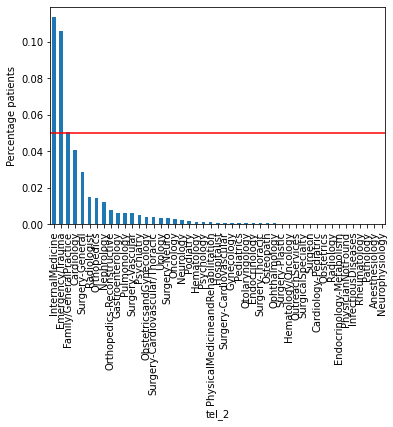

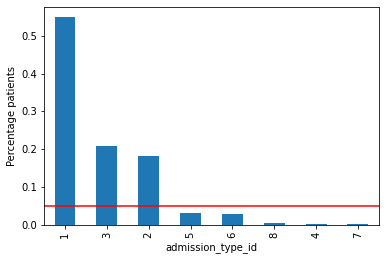

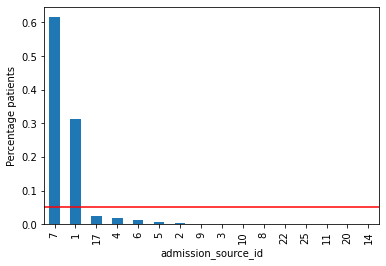

In [ ]:
# import matplotlib.pyplot as plt
# # let's plot how frequently each label
# # appears in the dataset

# # in other words, the percentage of houses in the data
# # with each label

total = len(data)

# # for each categorical variable
for col in ['race','gender','age','discharge_disposition_id','tel_1','tel_2','admission_type_id','admission_source_id']:

    # count the number of patients per category
    # and divide by total patients

    # aka percentage of patients per category

    temp_df = pd.Series(data[col].value_counts() / total)

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage patients')
    plt.show()

In [ ]:
test = test_df.copy()
test['diabetesMed'] = -1
new_merged = pd.concat([data,test],axis=0)
new_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22666 entries, 0 to 7969
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              22666 non-null  int64 
 1   patient_id                22666 non-null  int64 
 2   race                      22329 non-null  object
 3   gender                    22666 non-null  object
 4   age                       22666 non-null  object
 5   weight                    8351 non-null   object
 6   admission_type_id         22666 non-null  int64 
 7   discharge_disposition_id  22666 non-null  int64 
 8   admission_source_id       22666 non-null  int64 
 9   time_in_hospital          22666 non-null  int64 
 10  tel_1                     20208 non-null  object
 11  tel_2                     14544 non-null  object
 12  tel_3                     22666 non-null  int64 
 13  tel_4                     22666 non-null  int64 
 14  tel_5                  

In [ ]:
for col in data.columns:
    print('variable: ', col, ' number of labels: ', new_merged[col].nunique())

print('total houses: ', len(new_merged))

variable:  encounter_id  number of labels:  22666
variable:  patient_id  number of labels:  20194
variable:  race  number of labels:  6
variable:  gender  number of labels:  2
variable:  age  number of labels:  10
variable:  weight  number of labels:  9
variable:  admission_type_id  number of labels:  8
variable:  discharge_disposition_id  number of labels:  23
variable:  admission_source_id  number of labels:  16
variable:  time_in_hospital  number of labels:  14
variable:  tel_1  number of labels:  17
variable:  tel_2  number of labels:  58
variable:  tel_3  number of labels:  107
variable:  tel_4  number of labels:  7
variable:  tel_5  number of labels:  70
variable:  tel_6  number of labels:  26
variable:  tel_7  number of labels:  22
variable:  tel_8  number of labels:  16
variable:  tel_9  number of labels:  566
variable:  tel_10  number of labels:  549
variable:  tel_11  number of labels:  601
variable:  tel_12  number of labels:  16
variable:  tel_13  number of labels:  4
varia

In [ ]:
columns_with_no_variance = ['tel_30','tel_41','tel_28','tel_29','tel_45','tel_47','tel_20']
for col in columns_with_no_variance:
  print(data[col].value_counts())
  print(' ')



No    14696
Name: tel_30, dtype: int64
 
No    14696
Name: tel_41, dtype: int64
 
No    14696
Name: tel_28, dtype: int64
 
No    14696
Name: tel_29, dtype: int64
 
No    14696
Name: tel_45, dtype: int64
 
No    14696
Name: tel_47, dtype: int64
 
No    14696
Name: tel_20, dtype: int64
 


In [ ]:
data['tel_10'].unique()

array(['276', '786', 'V45', '250', '790', '401', '196', '331', '277',
       '250.11', '496', '707', '571', '413', '250.02', '403', '414',
       '427', '710', '907', '202', '730', '41', '197', '493', '599',
       '473', '295', '278', '486', '585', 'V42', '627', '112', '428',
       '682', '424', '491', '593', '564', '698', '411', '780', '881',
       '799', '250.03', '250.6', '303', 'E918', '789', '349', '285',
       '572', '162', '250.01', '294', '733', '434', 'V58', '53', '425',
       '583', '250.92', '784', '272', '782', '151', '335', '550', '584',
       '562', '518', '292', '280', '348', '511', '788', '286', '250.43',
       '592', '440', '924', '729', '410', '416', '300', '569', '537',
       '560', '596', '591', '250.13', 'E885', '296', '263', '535', '747',
       '435', '787', '438', '433', '578', '250.52', 'E932', '576', '783',
       '719', '716', '600', 'V85', '837', '490', '616', '507', '728',
       '443', '252', '305', '590', '996', '997', '998', '287', '135',
       

In [ ]:
data['tel_9'].unique()

array(['780', '727', '486', '715', '784', '440', '182', '434', '682',
       '584', '786', '845', '250.82', '572', '428', '414', '560',
       '250.11', '427', '562', '293', '38', '250.8', '599', '724', '415',
       '453', '295', 'V58', '996', '491', '577', '331', '250.13', '729',
       '716', '112', '528', '808', '276', '620', '42', '480', '707',
       '433', '350', '435', '789', '155', '403', '518', '8', '590', '426',
       '722', '873', '410', '493', '998', '824', '820', '271', '250.02',
       '585', '812', '790', '536', '296', '420', '250.6', '618', '569',
       '466', '250.2', '189', '805', '250.7', '558', '532', '401', '458',
       '298', '250.4', '250.81', '332', '600', '535', '278', '280', '494',
       '404', '933', '592', '531', '455', '578', '346', '198', '292',
       '402', '556', '202', '250.1', '348', '250.42', '411', '995', '788',
       '565', '482', 'V57', '969', '564', '813', '188', '530', '250',
       '485', '284', '421', '153', '70', '444', '566', '193', '2

In [ ]:
columns_to_drop = ['tel_30','tel_41','weight','patient_id','encounter_id','tel_2','tel_45','tel_47','tel_20','tel_28','tel_29'] #tel_1
data=data.drop(columns_to_drop,axis=1)

In [ ]:
# to split the datasets
from sklearn.model_selection import train_test_split
# let's separate into training and testing set


X_train, X_test, y_train, y_test = train_test_split(data.drop('diabetesMed',axis=1), # just the features
                                                    data['diabetesMed'], # the target
                                                    test_size=0.3, # the percentage of obs in the test set
                                                    random_state=42, # for reproducibility
                                                    stratify=data['diabetesMed']) # for fair distribution
X_train.shape, X_test.shape

((10287, 38), (4409, 38))

In [ ]:
cols_num = ['time_in_hospital','tel_3', 'tel_4', 'tel_5',
       'tel_6', 'tel_7', 'tel_8','tel_12']

X_train[cols_num].isnull().sum()

time_in_hospital    0
tel_3               0
tel_4               0
tel_5               0
tel_6               0
tel_7               0
tel_8               0
tel_12              0
dtype: int64

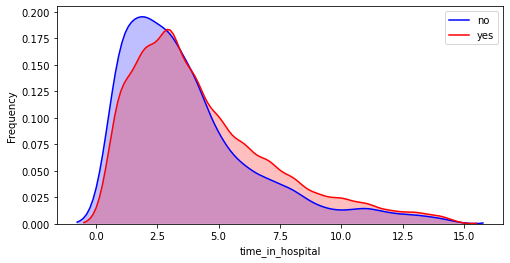

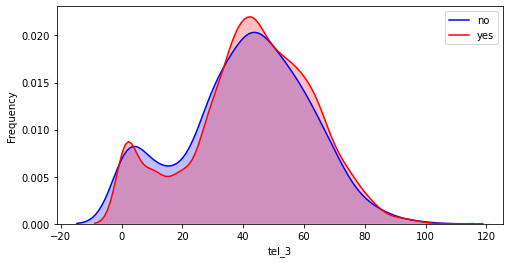

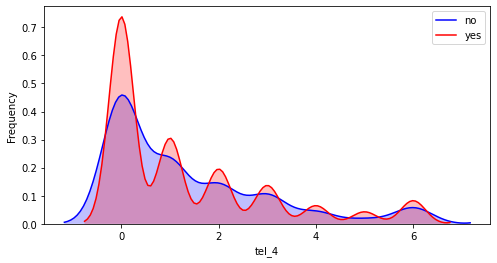

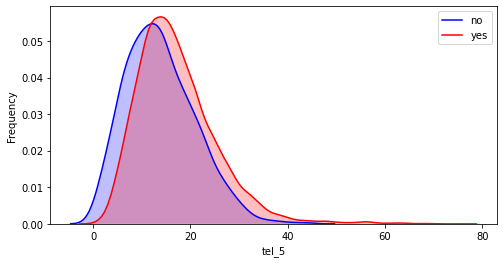

In [ ]:
merge = pd.concat([X_train,y_train],axis=1).reset_index()
for col in ['time_in_hospital','tel_3', 'tel_4', 'tel_5']:
  fig = plt.figure(figsize=(8,4),)
  ax=sns.kdeplot(merge.loc[(merge['diabetesMed'] == 0),col] , color='b',shade=True,label='no')
  ax=sns.kdeplot(merge.loc[(merge['diabetesMed'] == 1),col] , color='r',shade=True, label='yes')
  ax.set(xlabel=col, ylabel='Frequency')
  plt.show()

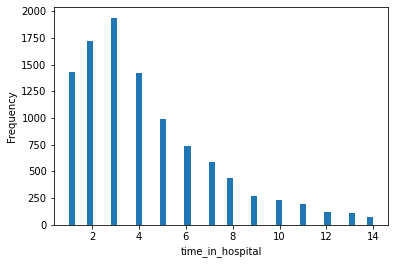

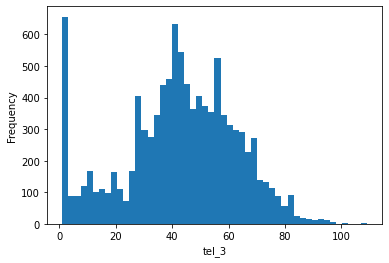

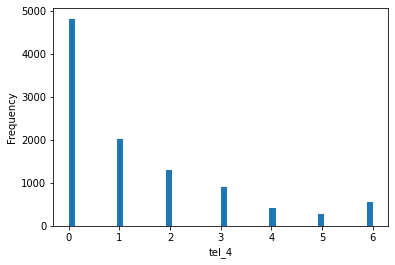

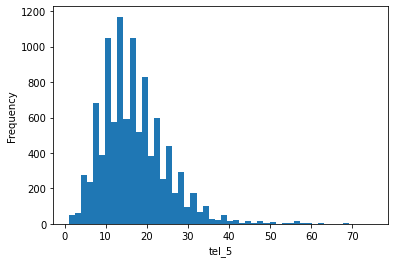

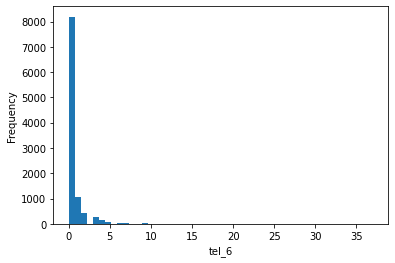

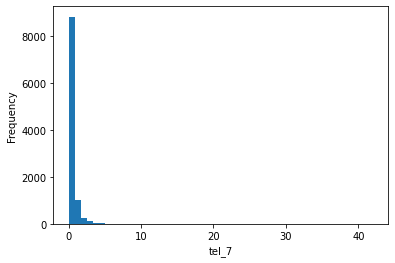

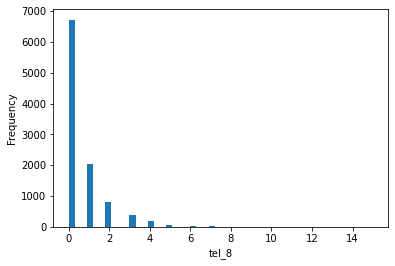

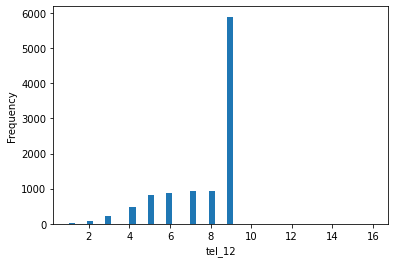

In [ ]:
for col in cols_num:
    plt.hist(X_train[col],bins=50)
    plt.gca().set(xlabel = col,ylabel='Frequency')
    plt.show()

In [ ]:
X_test[cols_num].isnull().sum()

time_in_hospital    0
tel_3               0
tel_4               0
tel_5               0
tel_6               0
tel_7               0
tel_8               0
tel_12              0
dtype: int64

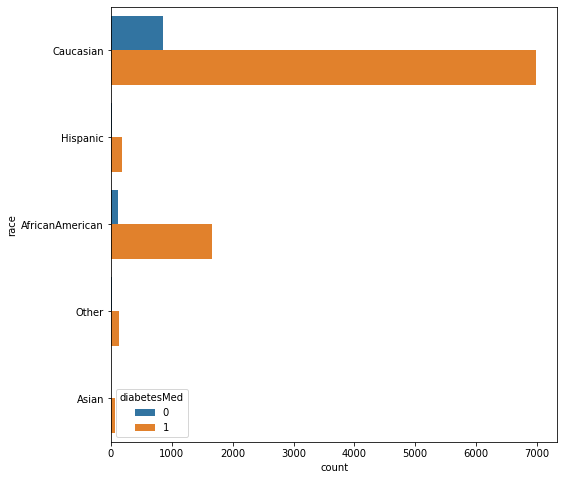

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = X_train['race'], hue = y_train)

Text(0.5, 1.0, 'Gender of Patient VS. TARGET')

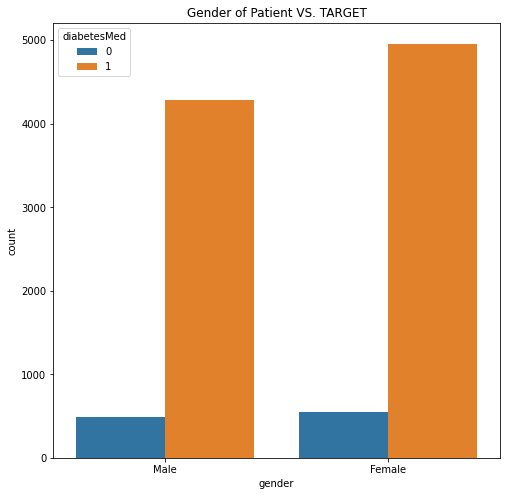

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.countplot(X_train['gender'], hue = y_train).set_title("Gender of Patient VS. TARGET")

Text(0.5, 1.0, 'tel_49 VS. TARGET')

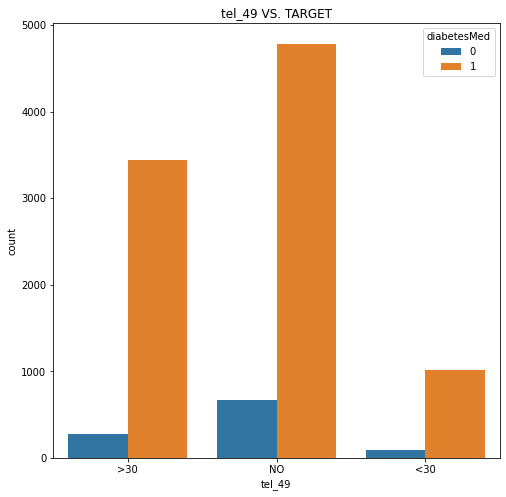

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.countplot(X_train['tel_49'], hue = y_train).set_title('tel_49 VS. TARGET')

Text(0.5, 1.0, 'tel_48 VS. TARGET')

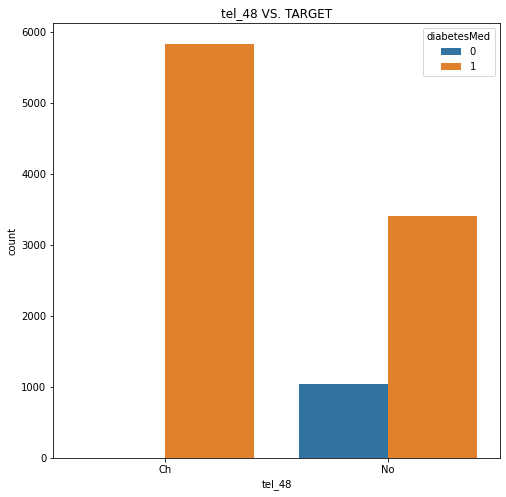

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.countplot(X_train['tel_48'], hue = y_train).set_title('tel_48 VS. TARGET')

Text(0.5, 1.0, 'tel_14 VS. TARGET')

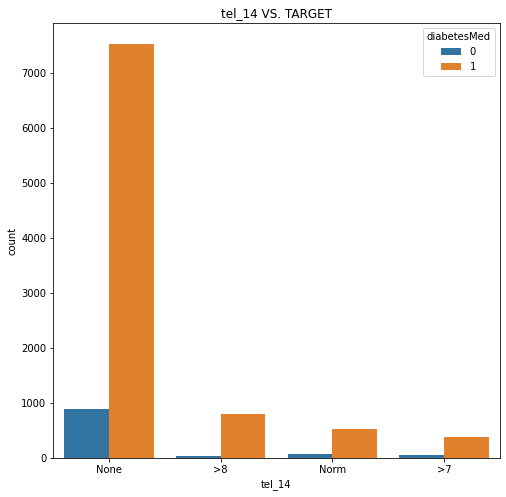

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.countplot(X_train['tel_14'], hue = y_train).set_title('tel_14 VS. TARGET')

In [ ]:
cols_cat = ['race', 'gender','tel_13', 'tel_14', 'tel_15', 'tel_16', 'tel_17', 'tel_18', 'tel_19',
        'tel_21', 'tel_22', 'tel_23', 'tel_24', 'tel_25', 'tel_26',
       'tel_27',  'tel_42', 'tel_43','tel_44',  'tel_46',  'tel_48' , 'tel_49']

In [ ]:
X_train[cols_cat].isnull().sum().sort_values(ascending=False).head(5)


race      233
tel_48      0
gender      0
tel_13      0
tel_14      0
dtype: int64

In [ ]:
for var in ['race','tel_9','tel_10','tel_11']:  
    X_train[var] = X_train[var].fillna('MISSING')
    X_test[var] = X_test[var].fillna('MISSING')


In [ ]:
for var in ['tel_9','tel_10','tel_11']:
    X_train.loc[X_train[var].astype(str).str.contains('E'),var] = 'E'
    X_train.loc[X_train[var].astype(str).str.contains('V'),var] = 'V'
    X_train.loc[X_train[var].astype(str).str.contains('[0-9]'),var] = 'NUM'

    X_test.loc[X_test[var].astype(str).str.contains('E'),var] = 'E'
    X_test.loc[X_test[var].astype(str).str.contains('V'),var] = 'V'
    X_test.loc[X_test[var].astype(str).str.contains('[0-9]'),var] = 'NUM'

In [ ]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

d = defaultdict(LabelEncoder)
CATEGORICAL_VARS_TO_LABELENCODE=['tel_9','tel_10','tel_11']
X_train[CATEGORICAL_VARS_TO_LABELENCODE] = X_train[CATEGORICAL_VARS_TO_LABELENCODE].apply(lambda x:d[x.name].fit_transform(x))
X_test[CATEGORICAL_VARS_TO_LABELENCODE] = X_test[CATEGORICAL_VARS_TO_LABELENCODE].apply(lambda x:d[x.name].transform(x))

In [ ]:
test_columns = ['tel_15','tel_16','tel_17','tel_18','tel_19','tel_21','tel_22','tel_23',
'tel_24','tel_25','tel_26','tel_27','tel_42','tel_43','tel_44','tel_46']
for col in test_columns:
  print(X_train[col].value_counts())
  print(' ')

No        7869
Steady    2231
Up         115
Down        72
Name: tel_15, dtype: int64
 
No        10070
Steady      197
Up           17
Down          3
Name: tel_16, dtype: int64
 
No        10173
Steady      105
Up            7
Down          2
Name: tel_17, dtype: int64
 
No        10282
Steady        5
Name: tel_18, dtype: int64
 
No        9610
Steady     618
Up          38
Down        21
Name: tel_19, dtype: int64
 
No        8833
Steady    1312
Up          74
Down        68
Name: tel_21, dtype: int64
 
No        9274
Steady     905
Up          57
Down        51
Name: tel_22, dtype: int64
 
No        10286
Steady        1
Name: tel_23, dtype: int64
 
No        9306
Steady     938
Up          27
Down        16
Name: tel_24, dtype: int64
 
No        9554
Steady     715
Up          16
Down         2
Name: tel_25, dtype: int64
 
No        10249
Steady       35
Down          2
Up            1
Name: tel_26, dtype: int64
 
No        10280
Steady        5
Up            1
Down          1
N

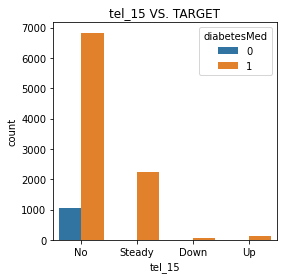

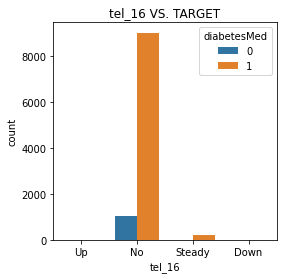

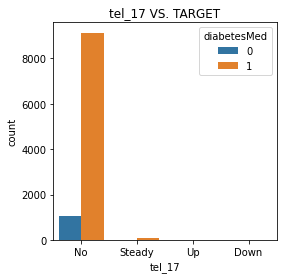

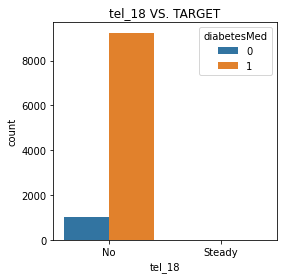

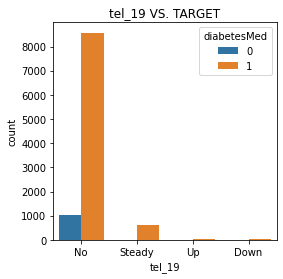

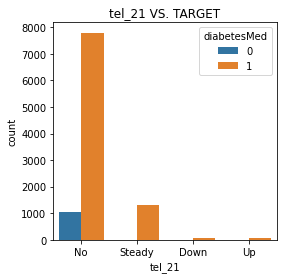

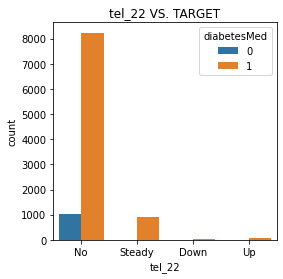

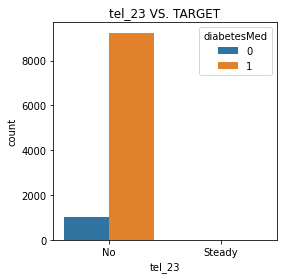

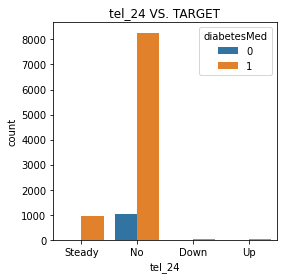

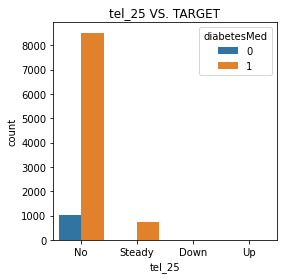

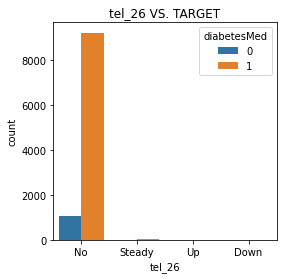

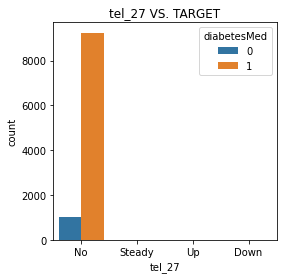

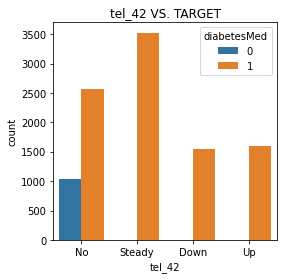

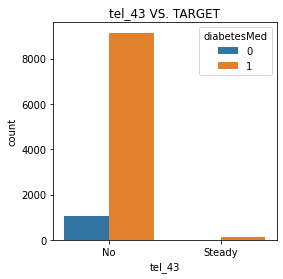

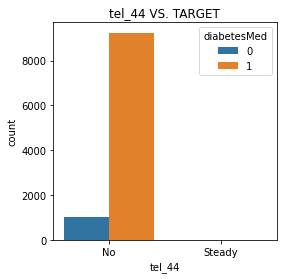

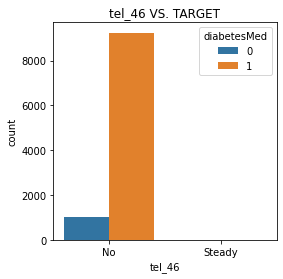

In [ ]:
for col in test_columns:
  fig = plt.figure(figsize=(4,4))
  sns.countplot(X_train[col], hue = y_train).set_title(col+' VS. TARGET')
  plt.show()

In [ ]:
for col in test_columns:
    X_train[col] = X_train[col].replace('No',0)
    X_train[col] = X_train[col].replace('Steady',1)
    X_train[col] = X_train[col].replace('Up',1)
    X_train[col] = X_train[col].replace('Down',1)

    X_test[col] = X_test[col].replace('No',0)
    X_test[col] = X_test[col].replace('Steady',1)
    X_test[col] = X_test[col].replace('Up',1)
    X_test[col] = X_test[col].replace('Down',1)

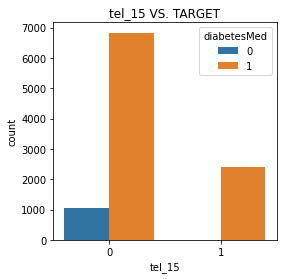

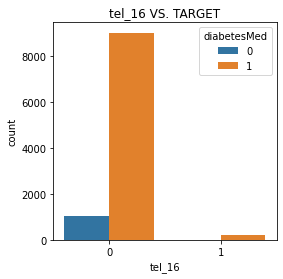

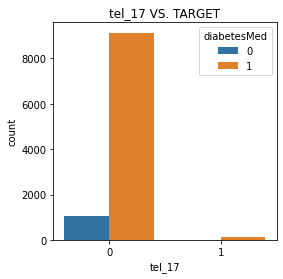

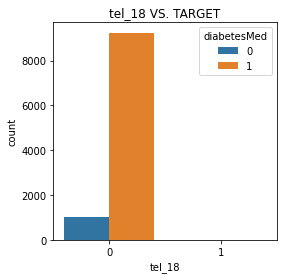

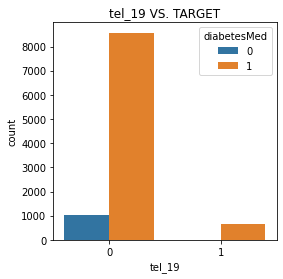

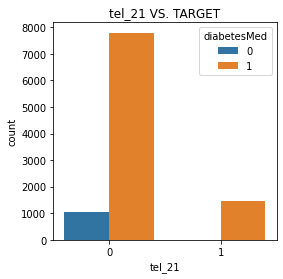

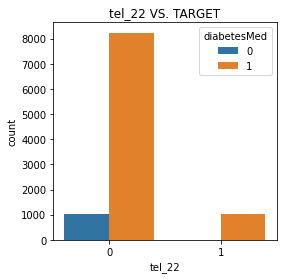

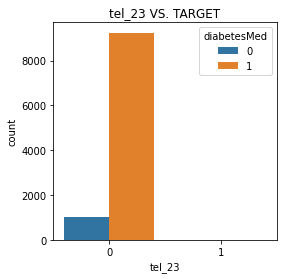

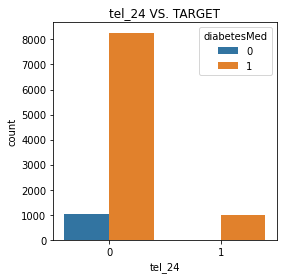

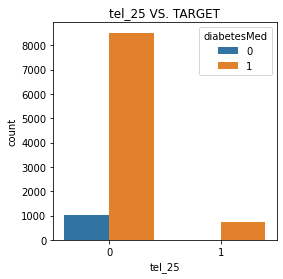

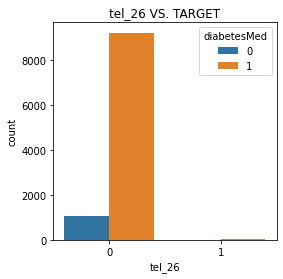

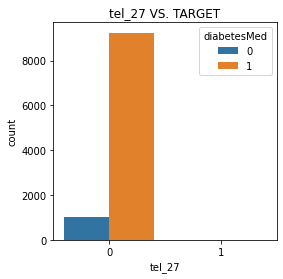

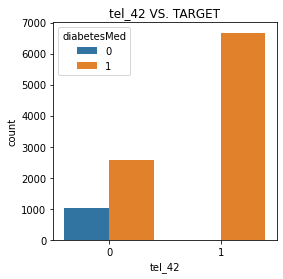

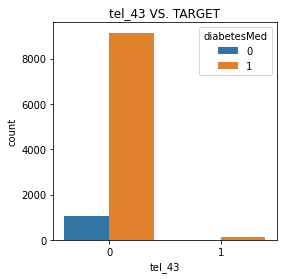

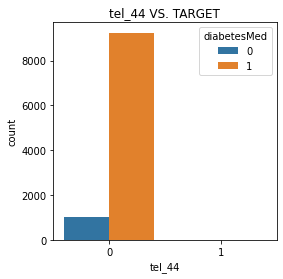

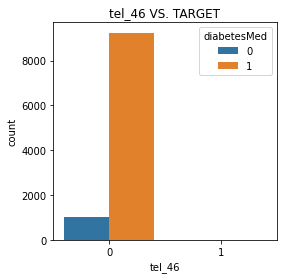

In [ ]:
for col in test_columns:
  fig = plt.figure(figsize=(4,4))
  sns.countplot(X_train[col], hue = y_train).set_title(col+' VS. TARGET')
  plt.show()

In [ ]:
cols_cat_num = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

cols_cat = ['race', 'gender', 'tel_1','tel_9','tel_10','tel_11','tel_13', 'tel_14','tel_48' , 'tel_49']


X_train[cols_cat_num] = X_train[cols_cat_num].astype('int')
train_df_cat = pd.get_dummies(X_train[cols_cat],drop_first = True)


In [ ]:
X_test[cols_cat_num] = X_test[cols_cat_num].astype('str')
test_df_cat = pd.get_dummies(X_test[cols_cat],drop_first = True)


In [ ]:
X_train = pd.concat([X_train,train_df_cat], axis = 1)
X_test = pd.concat([X_test,test_df_cat], axis = 1)


In [ ]:
X_train.groupby('age').size()


age
[0-10)         8
[10-20)       44
[20-30)      173
[30-40)      331
[40-50)      943
[50-60)     1673
[60-70)     2295
[70-80)     2718
[80-90)     1796
[90-100)     306
dtype: int64

Text(0.5, 1.0, 'Age of Patient VS. TARGET')

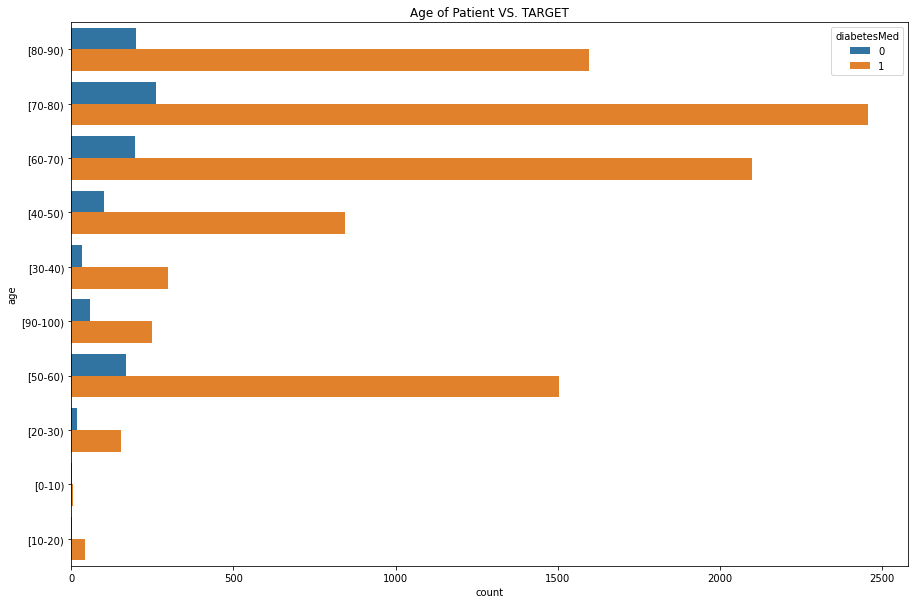

In [ ]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= X_train['age'], hue = y_train).set_title('Age of Patient VS. TARGET')

In [ ]:
age_id = {'[0-10)':5, 
          '[10-20)':15, 
          '[20-30)':25, 
          '[30-40)':35, 
          '[40-50)':45, 
          '[50-60)':55,
          '[60-70)':65, 
          '[70-80)':75, 
          '[80-90)':85, 
          '[90-100)':95}
X_train['age_group'] = X_train.age.replace(age_id)
X_test['age_group'] = X_test.age.replace(age_id)

In [ ]:
cols_extra = ['age_group']

In [ ]:
X_train = X_train.drop(cols_cat,axis=1)
#X_train = X_train.drop(cols_cat_num,axis=1)
X_train = X_train.drop('age',axis=1)


X_test = X_test.drop(cols_cat,axis=1)
#X_test = X_test.drop(cols_cat_num,axis=1)
X_test = X_test.drop('age',axis=1)

In [ ]:
X_train['tot_test_columns'] = 0
X_test['tot_test_columns'] = 0

for col in test_columns:
    X_train['tot_test_columns'] = X_train['tot_test_columns'] + X_train[col]
    X_test['tot_test_columns'] = X_test['tot_test_columns'] + X_test[col]


Text(0.5, 1.0, 'tot_test VS. TARGET')

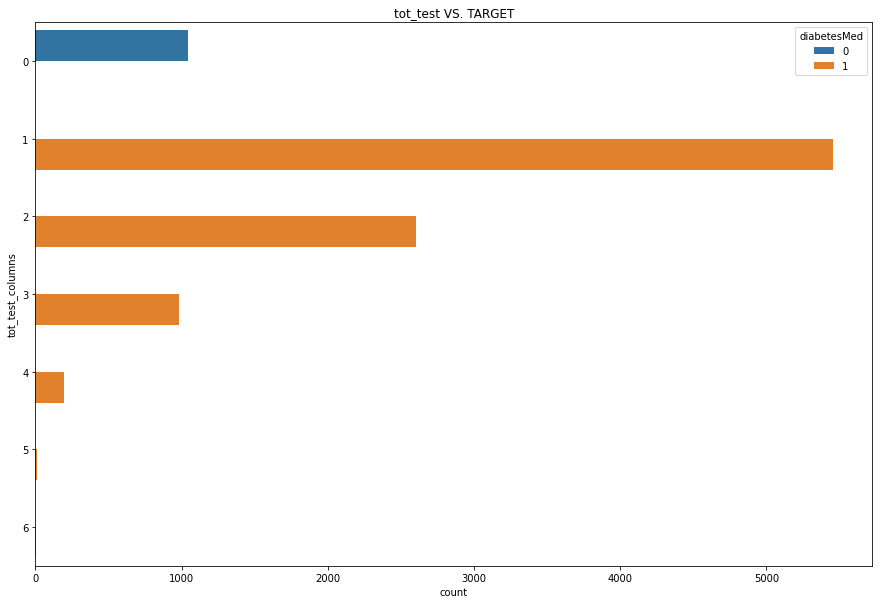

In [ ]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= X_train['tot_test_columns'], hue = y_train).set_title('tot_test VS. TARGET')

In [ ]:
cols_all_cat = list(X_train.columns)
cols_all_cat

['admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'tel_3',
 'tel_4',
 'tel_5',
 'tel_6',
 'tel_7',
 'tel_8',
 'tel_12',
 'tel_15',
 'tel_16',
 'tel_17',
 'tel_18',
 'tel_19',
 'tel_21',
 'tel_22',
 'tel_23',
 'tel_24',
 'tel_25',
 'tel_26',
 'tel_27',
 'tel_42',
 'tel_43',
 'tel_44',
 'tel_46',
 'race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_MISSING',
 'race_Other',
 'gender_Male',
 'tel_1_CH',
 'tel_1_CM',
 'tel_1_CP',
 'tel_1_DM',
 'tel_1_HM',
 'tel_1_MC',
 'tel_1_MD',
 'tel_1_MP',
 'tel_1_OG',
 'tel_1_OT',
 'tel_1_PO',
 'tel_1_SI',
 'tel_1_SP',
 'tel_1_UN',
 'tel_1_WC',
 'tel_13_>300',
 'tel_13_None',
 'tel_13_Norm',
 'tel_14_>8',
 'tel_14_None',
 'tel_14_Norm',
 'tel_48_No',
 'tel_49_>30',
 'tel_49_NO',
 'age_group',
 'tot_test_columns']

In [ ]:
X_train.isnull().sum().sort_values(ascending = False).head(10)


tot_test_columns    0
tel_18              0
tel_46              0
tel_44              0
tel_43              0
tel_42              0
tel_27              0
tel_26              0
tel_25              0
tel_24              0
dtype: int64

In [ ]:
missing_columns = list(set(X_train.columns) - set(X_test.columns))
for var in missing_columns:
    X_test[var]=0

In [ ]:
X_test.isnull().sum().sort_values(ascending = False).head(10)


tot_test_columns    0
tel_18              0
tel_46              0
tel_44              0
tel_43              0
tel_42              0
tel_27              0
tel_26              0
tel_25              0
tel_24              0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import recall_score
from sklearn.ensemble import GradientBoostingClassifier

thresh = 0.6

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_tf = scaler.transform(X_train)
test_tf = scaler.transform(X_test)

In [ ]:
X_train_tf.shape,test_tf.shape

((10287, 59), (4409, 59))

In [ ]:
def evaluation_metrics(y_actual,y_pred,thresh):
    score = 100 * recall_score(y_actual,(y_pred>thresh),average='weighted')
    print('recall:',score)
    return score

In [ ]:
lr=LogisticRegression(penalty='l2')
lr.fit(X_train_tf,y_train)
y_train_preds_lr = lr.predict_proba(X_train_tf)[:,1]
lr_train_recall = evaluation_metrics(y_train,y_train_preds_lr,thresh)

y_test_preds_lr = lr.predict_proba(test_tf)[:,1]

lr_test_recall = evaluation_metrics(y_test,y_test_preds_lr,thresh)

recall: 100.0
recall: 100.0


In [ ]:
rf= RandomForestClassifier(n_estimators = 10, max_depth=6, criterion = "gini", min_samples_split=10)
rf.fit(X_train_tf,y_train)
y_train_preds_rf = rf.predict_proba(X_train_tf)[:,1]
rf_train_recall = evaluation_metrics(y_train,y_train_preds_rf,thresh)
y_test_preds_rf = rf.predict_proba(test_tf)[:,1]

rf_test_recall = evaluation_metrics(y_test,y_test_preds_rf,thresh)

recall: 99.94167395742198
recall: 99.93195735994557


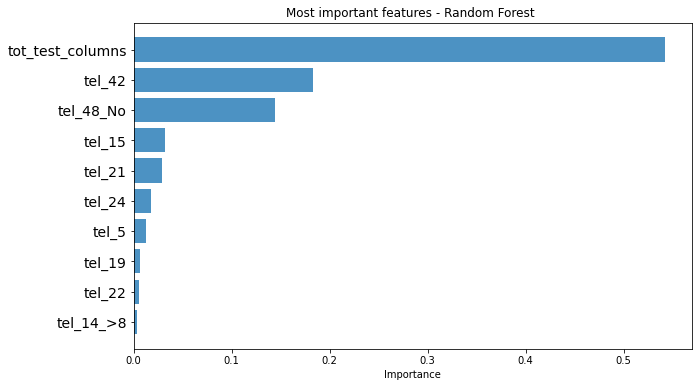

In [ ]:
import matplotlib.pyplot as plt

# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = rf.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest ')
plt.show()